In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

from statsmodels.miscmodels.ordinal_model import OrderedModel

url = "https://stats.idre.ucla.edu/stat/data/ologit.dta"
data_student = pd.read_stata(url)

mod_prob = OrderedModel(data_student['apply'],
                        data_student[['pared', 'public', 'gpa']],
                        distr='probit')

res_prob = mod_prob.fit(method='bfgs')


Optimization terminated successfully.
         Current function value: 0.896869
         Iterations: 17
         Function evaluations: 21
         Gradient evaluations: 21


In [2]:
# Predict the probabilities for each observation in the data
predicted_probs = res_prob.predict(exog=data_student[['pared', 'public', 'gpa']], which='prob')

# Display the predicted probabilities
predicted_probs

,0,1,2
0,0.551417,0.357687,0.090896
1,0.326009,0.448882,0.225109
2,0.234969,0.450637,0.314394
3,0.614250,0.318479,0.067271
4,0.651990,0.292845,0.055165
...,...,...,...
395,0.488692,0.391843,0.119465
396,0.638661,0.302065,0.059274
397,0.688281,0.266870,0.044849
398,0.551417,0.357687,0.090896


# Posterior probabilities as function of product sum

## Student data

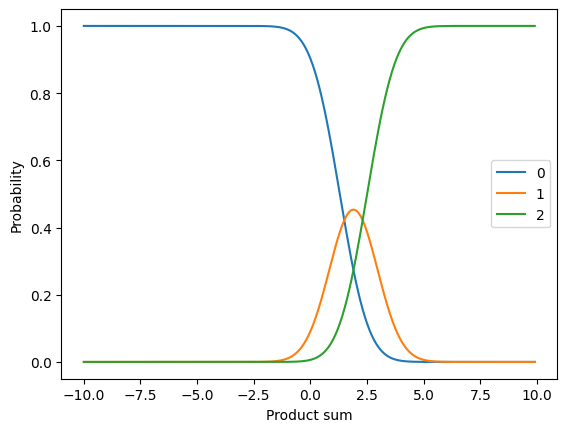

In [9]:
thresh = mod_prob.transform_threshold_params(res_prob.params)
product_sum = np.arange(-10, 10, .1)
xb = product_sum[:, None]
low = thresh[:-1] - xb
upp = thresh[1:] - xb
posteriors = mod_prob.prob(low, upp)

plt.plot(product_sum, posteriors[:, 0], label='0')
plt.plot(product_sum, posteriors[:, 1], label='1')
plt.plot(product_sum, posteriors[:, 2], label='2')
plt.xlabel('Product sum')
plt.ylabel('Probability')
plt.legend()
plt.show()

## Swespine

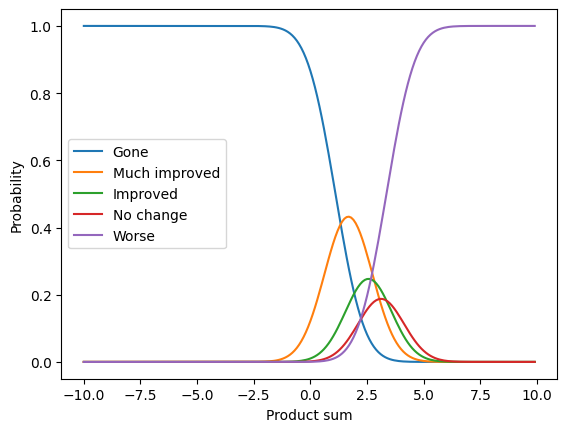

In [29]:
endog = np.random.randint(0, 5, size=100)
exog = np.random.randn(100, 2) # Two explanatory variables

product_sum_resolution = .1
model = OrderedModel(endog, exog, distr='logit')
thresh = np.array([ -np.inf, 1.10661659309414, 2.24957715814063, 2.87950171782969, 3.35447893227348, np.inf ])
labels = ['Gone', 'Much improved', 'Improved', 'No change', 'Worse'] # NOTE: Order not validated!
product_sum = np.arange(-10, 10, product_sum_resolution)
xb = product_sum[:, None]
low = thresh[:-1] - xb
upp = thresh[1:] - xb
posteriors = mod_prob.prob(low, upp)

for i in range(5):
    plt.plot(product_sum, posteriors[:, i], label=labels[i])
plt.xlabel('Product sum')
plt.ylabel('Probability')
plt.legend()
plt.show()

# Positive outcome as function of product sum

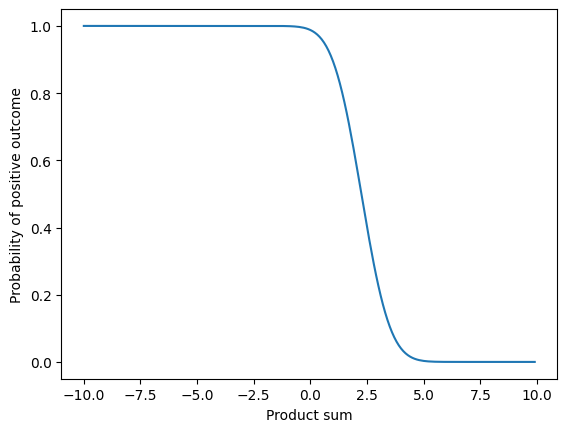

In [30]:
positive_posteriors = posteriors[:, 0] + posteriors[:, 1] # Note: Choice of indexes not validated
plt.plot(product_sum, positive_posteriors)
plt.xlabel('Product sum')
plt.ylabel('Probability of positive outcome')
plt.show()

# Estimate maximum slope

In [31]:
max_slope = np.max(np.abs(np.diff(positive_posteriors))) / product_sum_resolution
max_slope

np.float64(0.3987760811475122)